**SOLUBILITY**

Solubility refers to the capacity of a drug to dissolve in a solvent, typically water or biological fluids. In pharmacology, it is a crucial property that influences various aspects of drug development and therapeutic efficacy

In [1]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 30.6 MB/s eta 0:00:00


In [2]:
df = pd.read_excel('DATA1.xlsx')
#By using on_bad_lines='skip', you instruct pandas to skip any problematic lines instead of raising an error.

In [3]:
df.head()
#returns the first 5 rows to get a peak into the structure and values of the dataframe

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [4]:
df.shape
#checking the number of rows and columns in the dataframe

(6488, 47)

In [5]:
selected_columns=['Smiles','Standard Value']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()
#to have only the required columns in the dataframe - the canonical smiles notation and the value of solubility of the compound

,Smiles,Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,230.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,50000.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,50000.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,35.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,13.0


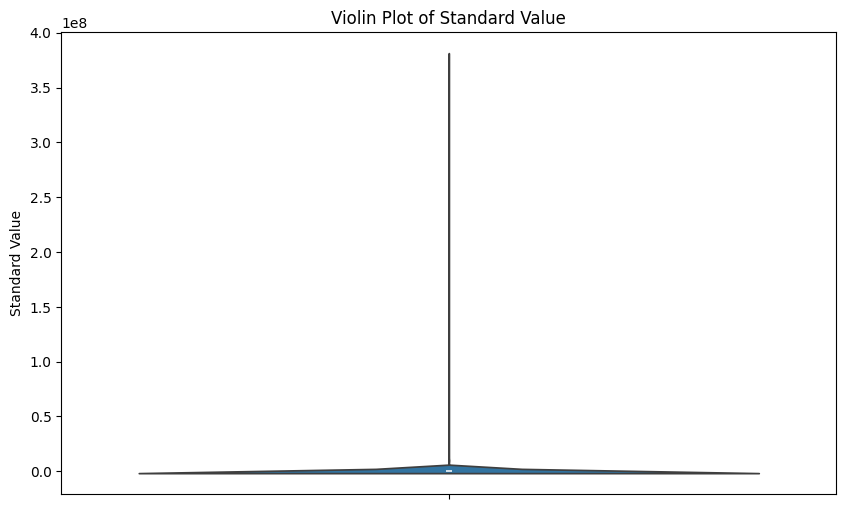

In [6]:
# Violin plot for Standard Value
plt.figure(figsize=(10, 6))
sns.violinplot(y='Standard Value', data=filter_df, inner="box")
plt.title('Violin Plot of Standard Value')
plt.ylabel('Standard Value')
plt.show()


In [7]:
# checking the range of solubility values - max and min
filter_df['Standard Value'].max()

379700000.0

In [8]:
filter_df['Standard Value'].min()

0.002

In [9]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 2: Choose columns to normalize (for example, numerical columns)
numerical_cols = filter_df.select_dtypes(include=['float64', 'int']).columns.tolist()

# Min-Max Normalization
scaler = MinMaxScaler()
filter_df[numerical_cols] = scaler.fit_transform(filter_df[numerical_cols])

# Optionally, display the DataFrame after Min-Max normalization
print("\nDataFrame after Min-Max Normalization:")
print(filter_df.head())

# If you prefer Z-score normalization
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 3: Save the normalized data to a new CSV file
normalized_file_path = 'normalized_file.csv'  # Replace with desired output file path
filter_df.to_csv(normalized_file_path, index=False)

# Optionally, display the normalized DataFrame
print("\nDataFrame after Z-score Normalization:")
print(filter_df.head())



DataFrame after Min-Max Normalization:
                                              Smiles  Standard Value
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...    6.057361e-07
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1    1.316829e-04
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...    1.316829e-04
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...    9.217277e-08
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...    3.423229e-08

DataFrame after Z-score Normalization:
                                              Smiles  Standard Value
0  CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...    6.057361e-07
1                 O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1    1.316829e-04
2  C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...    1.316829e-04
3  Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...    9.217277e-08
4  COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...    3.423229e-08


In [10]:
if 'Standard Value' in df.columns:
    # Step 3: Convert IC50 from nanomolar to molar
    filter_df['IC50_M'] = filter_df['Standard Value'] / 1e9  # Convert nM to M

    # Step 4: Calculate pIC50 values using the molar IC50
    filter_df['pIC50'] = -np.log10(filter_df['IC50_M'])

    # Optionally, display the DataFrame after calculations
    print("\nDataFrame with IC50 in M and pIC50 values:")
    print(filter_df[['Standard Value', 'IC50_M', 'pIC50']].head())

    # Step 5: Save the updated DataFrame to a new CSV file
    updated_file_path = 'updated_file.csv'  # Replace with desired output file path
    filter_df.to_csv(updated_file_path, index=False)
else:
    print("IC50 column not found in the DataFrame.")


DataFrame with IC50 in M and pIC50 values:
   Standard Value        IC50_M      pIC50
0    6.057361e-07  6.057361e-16  15.217717
1    1.316829e-04  1.316829e-13  12.880471
2    1.316829e-04  1.316829e-13  12.880471
3    9.217277e-08  9.217277e-17  16.035397
4    3.423229e-08  3.423229e-17  16.465564


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
import pandas as pd

# Assuming your DataFrame is 'filter_df'
SV_threshold = pd.Series([None] * len(filter_df.columns), index=filter_df.columns)

# Append the empty row using pd.concat
filter_df = pd.concat([filter_df, pd.DataFrame([SV_threshold])], ignore_index=True)

# View the updated DataFrame
print(filter_df)


                                                 Smiles  Standard Value  \
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...    6.057361e-07   
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1    1.316829e-04   
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...    1.316829e-04   
3     Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...    9.217277e-08   
4     COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...    3.423229e-08   
...                                                 ...             ...   
6484   O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO    1.237293e-08   
6485      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1    5.741374e-05   
6486  Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...    4.740532e-07   
6487  COc1cc(C(=O)c2csc(-c3ccc(C#CCCC(=O)Nc4ccccc4N)...    5.327890e-05   
6488                                               None             NaN   

            IC50_M      pIC50  
0     6.057361e-16  15.217717  
1     1.316829e-13  12.880471  
2  

<ipython-input-11-9375928b2bd1>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filter_df = pd.concat([filter_df, pd.DataFrame([SV_threshold])], ignore_index=True)


In [12]:
#division into classes based on biological analysis :
#RANK 1- high solubility
#RANK 2 - moderate solubility
#RANK 3 - low solubility

SV_threshold=[]

for i in filter_df['pIC50']:
  if float(i) > 7:
      SV_threshold.append("Rank I")
  elif 7 > float(i) > 5:
      SV_threshold.append("Rank II")
  else:
      SV_threshold.append("Rank III")

In [13]:
#checking the number of compounds in each class
#you can replace rank 1 by rank 2 and 3 to check the number of compunds in those classes

count_r1=0
for ele in SV_threshold:
  if ele=="Rank III":count_r1+=1

print(count_r1)

190


In [14]:
filter_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Smiles,Standard Value,IC50_M,pIC50
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,6.057361e-07,6.057361e-16,15.217717
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,1.316829e-04,1.316829e-13,12.880471
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,1.316829e-04,1.316829e-13,12.880471
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,9.217277e-08,9.217277e-17,16.035397
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,3.423229e-08,3.423229e-17,16.465564


In [15]:
#adding the solubility class as a column in the dataframe
#first we have to convert list to a series and then join/concatenate it with the earlier dataframe

SV_class = pd.Series(SV_threshold, name='SV_threshold')
final_df = pd.concat([filter_df, SV_class], axis=1)
final_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Smiles,Standard Value,IC50_M,pIC50,SV_threshold
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,6.057361e-07,6.057361e-16,15.217717,Rank I
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,1.316829e-04,1.316829e-13,12.880471,Rank I
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,1.316829e-04,1.316829e-13,12.880471,Rank I
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,9.217277e-08,9.217277e-17,16.035397,Rank I
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,3.423229e-08,3.423229e-17,16.465564,Rank I


In [16]:
print(final_df)

                                                 Smiles  Standard Value  \
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...    6.057361e-07   
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1    1.316829e-04   
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...    1.316829e-04   
3     Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...    9.217277e-08   
4     COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...    3.423229e-08   
...                                                 ...             ...   
6484   O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO    1.237293e-08   
6485      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1    5.741374e-05   
6486  Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...    4.740532e-07   
6487  COc1cc(C(=O)c2csc(-c3ccc(C#CCCC(=O)Nc4ccccc4N)...    5.327890e-05   
6488                                               None             NaN   

            IC50_M      pIC50 SV_threshold  
0     6.057361e-16  15.217717       Rank I  
1     1.3

In [17]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [18]:
#generating chemical descriptors of the compunds using rdkit library
#these descriptors are the features on which our ml model will be trained

descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = filter_df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors


Streaming output truncated to the last 5000 lines.
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:38:07] DEPRECATION WARNING: please use MorganGenerator
[05:3

In [19]:
print(results_df)

                                                 Smiles  Standard Value  \
0     CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...    6.057361e-07   
1                    O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1    1.316829e-04   
2     C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...    1.316829e-04   
3     Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...    9.217277e-08   
4     COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...    3.423229e-08   
...                                                 ...             ...   
6484   O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO    1.237293e-08   
6485      CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1    5.741374e-05   
6486  Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...    4.740532e-07   
6487  COc1cc(C(=O)c2csc(-c3ccc(C#CCCC(=O)Nc4ccccc4N)...    5.327890e-05   
6488                                               None             NaN   

            IC50_M      pIC50 SV_threshold  MaxAbsEStateIndex  MaxEStateIndex  \
0     6.057361e-16

In [22]:
# # dropping any missing values
cleaned_final = results_df.dropna()
#print(f"Original DataFrame shape: {results_df.shape}")
#print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

In [ ]:
# c=0
# check=cleaned_final['SV_threshold']
# for ele in check:
#   if ele=='Rank III': c+=1

# print(c)

In [23]:
cleaned_final.head()

,Smiles,Standard Value,IC50_M,pIC50,SV_threshold,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,6.057361e-07,6.057361e-16,15.217717,Rank I,13.450481,13.450481,0.167702,-1.237584,0.295108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,1.316829e-04,1.316829e-13,12.880471,Rank I,12.191887,12.191887,0.045335,-0.248971,0.705740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,1.316829e-04,1.316829e-13,12.880471,Rank I,12.957424,12.957424,0.049385,-0.317974,0.328284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,9.217277e-08,9.217277e-17,16.035397,Rank I,12.632866,12.632866,0.003616,-0.353767,0.295518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,3.423229e-08,3.423229e-17,16.465564,Rank I,13.653820,13.653820,0.215010,-1.135580,0.141117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [48]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Create a copy of the dataset
robust_dt = results_df.copy()

# Identify numeric columns excluding 'FDA_APPROVED'
numeric_columns1 = robust_dt.select_dtypes(include=['float64', 'int64']).columns

# Replace infinity values with NaN
robust_dt[numeric_columns1] = robust_dt[numeric_columns1].replace([np.inf, -np.inf], np.nan)

# Option 1: Drop rows with NaN values in the numeric columns (you can also choose to fill NaN)
robust_dt.dropna(subset=numeric_columns1, inplace=True)

# Option 2: Fill NaN values with 0 or another strategy (e.g., column mean)
# robust_dt[numeric_columns1] = robust_dt[numeric_columns1].fillna(0)

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply scaling to the numeric columns
robust_dt[numeric_columns1] = scaler.fit_transform(robust_dt[numeric_columns1])

robust_dt


,Smiles,Standard Value,IC50_M,pIC50,SV_threshold,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,0.055432,0.055432,-0.125014,Rank I,0.653192,0.653192,0.290682,-1.745442,-0.235108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,27.644124,27.644124,-1.304203,Rank I,-0.154350,-0.154350,-0.417012,0.777703,1.141736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,27.644124,27.644124,-1.304203,Rank I,0.336836,0.336836,-0.393594,0.601592,-0.123867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,-0.052661,-0.052661,0.287523,Rank I,0.128592,0.128592,-0.658291,0.510241,-0.233731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,-0.064856,-0.064856,0.504551,Rank I,0.783659,0.783659,0.564281,-1.485108,-0.751437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,-0.053769,-0.053769,0.300417,Rank I,-0.539627,-0.539627,-0.602621,0.495800,0.060331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,-0.069457,-0.069457,0.727531,Rank I,-0.022476,-0.022476,0.594317,0.455681,-0.425267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,12.012195,12.012195,-1.122317,Rank I,0.015751,0.015751,0.181900,0.847661,-0.067371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,0.027716,0.027716,-0.071304,Rank I,0.692765,0.692765,-0.250501,0.390204,-0.957871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = cleaned_final.copy()

# numeric columns excluding 'solubility' which is our target column for prediction by model
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'Standard Value'] # dont scale y!

scaler = RobustScaler()

# Drop rows with NaN values in the 'pIC50' column
df_robust = df_robust.dropna(subset=['pIC50'])
# Fill NaN values in 'pIC50' column with the median of that column
df_robust['pIC50'].fillna(df_robust['pIC50'].median(), inplace=True)

# Check for NaN values
print(df_robust[numeric_columns].isna().sum())

# Check for infinite values
print(df_robust[numeric_columns].isin([np.inf, -np.inf]).sum())

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()

In [28]:
robust_dt.shape

(6269, 215)

In [29]:
#there are some invalid entries(values tending to infinity) that were giving errors in the subsequent steps, this code is to remove those invalid entries

invalid_count = 0

# Maximum value for float32
float32_threshold = np.finfo(np.float32).max

# Iterate through all rows and columns
rows_to_drop = []

for index, row in robust_dt.iterrows():
    for value in row:
        # Check if the value is numeric before applying isinf or comparing thresholds
        if pd.api.types.is_numeric_dtype(type(value)):
            if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:
                rows_to_drop.append(index)
                invalid_count += 1
                break  # Break after marking the row to drop
        else:
            # If it's not numeric, just check for NaN
            if pd.isnull(value):
                rows_to_drop.append(index)
                invalid_count += 1
                break

# Drop rows that contain invalid values
robust_dt.drop(rows_to_drop, inplace=True)

# Output the number of invalid entries dropped
print(f"Dropped {invalid_count} invalid entries.")


Dropped 0 invalid entries.


In [30]:
robust_dt.shape

(6269, 215)

In [49]:
robust_dt.head()

,Smiles,Standard Value,IC50_M,pIC50,SV_threshold,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,0.055432,0.055432,-0.125014,Rank I,0.653192,0.653192,0.290682,-1.745442,-0.235108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,27.644124,27.644124,-1.304203,Rank I,-0.154350,-0.154350,-0.417012,0.777703,1.141736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,27.644124,27.644124,-1.304203,Rank I,0.336836,0.336836,-0.393594,0.601592,-0.123867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,-0.052661,-0.052661,0.287523,Rank I,0.128592,0.128592,-0.658291,0.510241,-0.233731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,-0.064856,-0.064856,0.504551,Rank I,0.783659,0.783659,0.564281,-1.485108,-0.751437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


In [51]:
#spitting into X features and y target for model
y = robust_dt['SV_threshold']
X = robust_dt.drop(columns=['Smiles','SV_threshold'])

In [52]:
print(y.head())
print(X.head())

0    Rank I
1    Rank I
2    Rank I
3    Rank I
4    Rank I
Name: SV_threshold, dtype: object
   Standard Value     IC50_M     pIC50  MaxAbsEStateIndex  MaxEStateIndex  \
0        0.055432   0.055432 -0.125014           0.653192        0.653192   
1       27.644124  27.644124 -1.304203          -0.154350       -0.154350   
2       27.644124  27.644124 -1.304203           0.336836        0.336836   
3       -0.052661  -0.052661  0.287523           0.128592        0.128592   
4       -0.064856  -0.064856  0.504551           0.783659        0.783659   

   MinAbsEStateIndex  MinEStateIndex       qed       SPS     MolWt  ...  \
0           0.290682       -1.745442 -0.235108  2.925740  1.144616  ...   
1          -0.417012        0.777703  1.141736 -0.321783 -0.744341  ...   
2          -0.393594        0.601592 -0.123867  0.803345  0.854386  ...   
3          -0.658291        0.510241 -0.233731 -0.232860  0.096789  ...   
4           0.564281       -1.485108 -0.751437 -0.081389  0.681861  

In [53]:
#FEATURE SELECTION - can be done using rfe or feature importance
#you can experiment using different number of features and examining the model performance in the subsequent steps

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)


Top n features: ['Standard Value', 'fr_Ar_NH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl']


In [54]:
#X data filter to have only the required columns based in selected features
X_selected = pd.DataFrame(X, columns=selected_features)

X_selected.head()

,Standard Value,fr_Ar_NH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,...,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl
0,0.055432,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-1.0,0.0
1,27.644124,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.644124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,-0.052661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
4,-0.064856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0


In [55]:
print(X_selected)

      Standard Value  fr_Ar_NH  fr_COO  fr_COO2  fr_C_O  fr_C_O_noCOO  fr_C_S  \
0           0.055432       0.0     0.0      0.0     2.0           2.0     0.0   
1          27.644124       0.0     0.0      0.0    -1.0          -1.0     0.0   
2          27.644124       0.0     0.0      0.0     0.0           0.0     0.0   
3          -0.052661       0.0     0.0      0.0     0.0           0.0     0.0   
4          -0.064856       0.0     0.0      0.0     0.0           0.0     0.0   
...              ...       ...     ...      ...     ...           ...     ...   
6483       -0.053769       0.0     0.0      0.0     0.0           0.0     0.0   
6484       -0.069457       0.0     0.0      0.0     0.0           0.0     0.0   
6485       12.012195       0.0     0.0      0.0    -1.0          -1.0     0.0   
6486        0.027716       1.0     0.0      0.0     1.0           1.0     0.0   
6487       11.141907       0.0     0.0      0.0     0.0           0.0     0.0   

      fr_HOCCN  fr_Imine  f

In [56]:
#combining X and y as data to split it into train and test
data=X_selected.copy()
data['SV_threshold']=y

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
target = 'SV_threshold'

In [57]:
#WITHOUT TAKING HYPERPARAMETER TUNING INTO CONSIDERATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

y_train_pred=rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      Rank I       1.00      1.00      1.00      1254

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254

Confusion Matrix:
[[1254]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Get unique labels in the target variable
labels = y_train.unique()

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

y_train_pred = rf_classifier.predict(X_train)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=labels))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      Rank I       1.00      1.00      1.00      1254

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254

Confusion Matrix:
[[1254]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Print classification report for training
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

In [ ]:
#WITH HYPERPARAMETER TUNING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into features (X) and target (y)
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Initializing the Random Forest Classifier with adjustments
rf_classifier = RandomForestClassifier(
    n_estimators=150,          # Increase number of trees
    max_depth=8,              # Limit maximum depth of trees
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=3,        # Minimum samples at a leaf node
    random_state=42,
    max_features='sqrt'
)

# Fitting the model on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also evaluate training predictions
y_train_pred = rf_classifier.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))


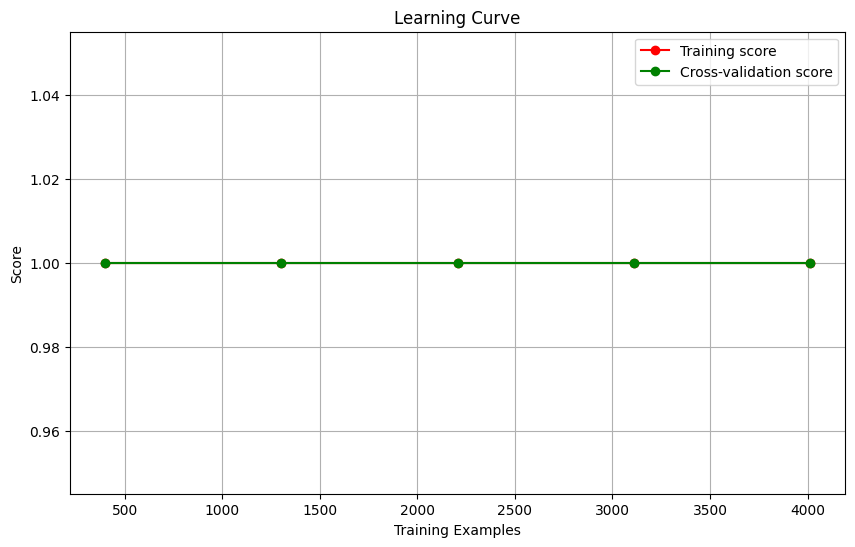

In [45]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    # Calculate learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curve for the RandomForestClassifier
plot_learning_curve(rf_classifier, X_train, y_train)

In [ ]:
! pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
lazy_class = LazyClassifier()
train,test = lazy_class.fit(X_train, X_test, y_train, y_test)

# Print the results
print(train)

In [ ]:
print(test)

In [44]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.4 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt','log2',None])

    # Create and evaluate the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    score = cross_val_score(model, X_selected, y, n_jobs=-1, cv=3).mean()
    return score

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}
randomized_search = RandomizedSearchCV(estimator=rf,
                                       param_distributions=param_dist,
                                       n_iter=50,  # Number of parameter settings to sample
                                       scoring='accuracy',
                                       cv=5,
                                       verbose=2,
                                       n_jobs=-1,
                                       random_state=42)  # For reproducibility
randomized_search.fit(X_train, y_train)
print("Best Parameters:", randomized_search.best_params_)
print("Best Cross-validation Score:", randomized_search.best_score_)
best_rf = randomized_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print("Test Score:", test_score)

In [ ]:
from google.colab import files
data=files.upload()

In [ ]:
solubility_test = pd.read_csv('solubility_test.csv', names=['name','smiles'])

In [ ]:
solubility_test

In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt


calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)


def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)


descriptors = solubility_test['smiles'].apply(calculate_descriptors) # calculating descriptors for all smiles in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors as lists to a new data frame, whose column heading is the descriptor name
results_dt = pd.concat([solubility_test, desc], axis=1) # make a final data frame


In [ ]:
cleaned_dt= results_dt.dropna()
print(f"Original DataFrame shape: {results_dt.shape}")
print(f"Cleaned DataFrame shape: {cleaned_dt.shape}")

In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
robust_dt = cleaned_dt.copy()

# numeric columns excluding 'FDA_APPROVED'
numeric_columns1 = robust_dt.select_dtypes(include=['float64', 'int64']).columns
numeric_columns1 = [col for col in numeric_columns1]

scaler = RobustScaler()

# scale selected numeric columns
robust_dt[numeric_columns1] = scaler.fit_transform(robust_dt[numeric_columns1])

robust_dt

In [ ]:
filter_dt=pd.DataFrame(robust_dt,columns=selected_features)
filter_dt

In [ ]:
dt_pred = rf_classifier.predict(filter_dt)
dt_pred

In [ ]:
name_dt=pd.DataFrame(cleaned_dt,columns=['name','smiles'])
final_dt=name_dt.copy()
final_dt['bioactivity_class']=dt_pred
final_dt

In [ ]:
display_df=pd.concat([final_dt,dt_pred_proba],axis=1)

In [ ]:
#selecting rank 1
rank1_comp=final_dt[final_dt['bioactivity_class']=='Rank I']
rank1_comp

In [ ]:
leads=rank1_comp['smiles']
leads